In [13]:
import json
import matplotlib.pyplot as plt

In [29]:
import gensim, logging
from numpy import average
import os
from scipy import spatial

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


In [27]:
new_topics = json.loads(open('analyzed_topics.json').read())

In [30]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [31]:
model = gensim.models.KeyedVectors.load_word2vec_format(os.path.join('word2vec_models','enwiki_5_ner.bin'), binary=True)

2017-05-30 21:20:02,261 : INFO : loading projection weights from word2vec_models\enwiki_5_ner.bin
2017-05-30 21:20:41,307 : INFO : loaded (296630, 300) matrix from word2vec_models\enwiki_5_ner.bin


In [32]:
model.init_sims(replace=True)

2017-05-30 21:20:44,944 : INFO : precomputing L2-norms of word weight vectors


In [2]:
clusters = {}
f = open('topics_0.05.csv', 'r', encoding='utf-8').read().split('\n')[1:]
for i in f:
    try:
        topic, cluster = i.split('\t')
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(topic)
    except:
        print(i)

In [3]:
len(clusters)

1014

In [35]:
pos_tags = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB']

n = 0
c = 0
t = 0
l = len(new_topics)
topic_vectors = {}
for i in new_topics:
    c += 1
    if c == 1000:
        t += 1
        print(str(t) + '/20')
        c = 0
    words = i.split(' ')
    arr = []
    for word in words:
        for pos_tag in pos_tags:
            word_tagged = word + '_' + pos_tag
            if word_tagged in model:
#                 print(word, model[word_tagged][:10])
                arr.append(model[word_tagged])
                break
    vector = average(arr, axis=0)
    if vector.shape != ():
        for topic in new_topics[i]:
            topic_vectors[topic] = vector
    else:
        n +=1
print(n)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20
1678


In [38]:
similarity_per_cluster = {}
no_similarity = []

h = 0
c = 0
for cluster in clusters:
    c += 1
    if c == 20:
        c = 0
        h += 20
        print(str(h) + '/1000')
    similarity = []
    for i in range(len(clusters[cluster])):
        for l in range(i+1, len(clusters[cluster])):
            el_1 = clusters[cluster][i]
            el_2 = clusters[cluster][l]
            if el_1 in topic_vectors and el_2 in topic_vectors:
                result = 1 - spatial.distance.cosine(topic_vectors[el_1], topic_vectors[el_2])
                similarity.append(result)
    if similarity == []:
        no_similarity.append(cluster)
    similarity_per_cluster[cluster] = similarity

20/1000
40/1000
60/1000
80/1000
100/1000
120/1000
140/1000
160/1000
180/1000
200/1000
220/1000
240/1000
260/1000
280/1000
300/1000
320/1000
340/1000
360/1000
380/1000
400/1000
420/1000
440/1000
460/1000
480/1000
500/1000
520/1000
540/1000
560/1000
580/1000
600/1000
620/1000
640/1000
660/1000
680/1000
700/1000
720/1000
740/1000
760/1000
780/1000
800/1000
820/1000
840/1000
860/1000
880/1000
900/1000
920/1000
940/1000
960/1000
980/1000
1000/1000


In [ ]:
with open('similarity_per_cluster.json', 'w') as outfile:
    json.dump(similarity_per_cluster, outfile)

In [4]:
sim_per_cl = json.loads(open('similarity_per_cluster.json', 'r').read())

In [7]:
print(len(sim_per_cl) - 548)

466


In [25]:
size_sim = {}

for cluster in clusters:
    size_sim[len(clusters[cluster])] = sim_per_cl[cluster]

In [27]:
plt.plot(list(size_sim.keys()), list(size_sim.values()), 'ro')
plt.show()

ValueError: setting an array element with a sequence.

In [12]:
sims = {0.0: 0, 0.1: 0, 0.2: 0, 0.3: 0, 0.4: 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 0.9: 0, 1.0: 0,}

for i in sim_per_cl:
    if len(sim_per_cl[i]) != 0:
        m = sum(sim_per_cl[i])/len(sim_per_cl[i])
        for number in sims:
            if m >= number and m < number+0.1:
                sims[number] += 1
print(sims)

{0.0: 0, 0.1: 11, 0.2: 123, 0.3: 142, 0.4: 54, 0.5: 33, 0.6: 29, 0.7: 18, 0.8: 34, 0.9: 21, 1.0: 1}


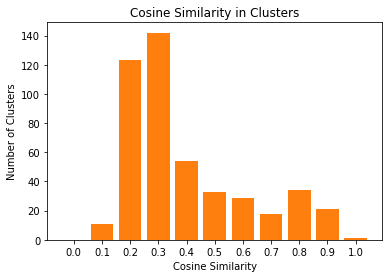

In [24]:
plt.bar(range(len(sims)), sims.values(), align='center')
plt.xticks(range(len(sims)), sims.keys())
plt.title('Cosine Similarity in Clusters')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of Clusters')
plt.show()
# plt.savefig('cosine_similarity_in_clusters.png')

In [34]:
arr = [1, 2, 3, 4]
for i in range(len(arr)):
    for l in range(i+1, len(arr)):
        print(arr[i], arr[l])

1 2
1 3
1 4
2 3
2 4
3 4


In [21]:
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)